## Import all the dependencies

In [36]:
from hpsklearn import HyperoptEstimator, random_forest, one_hot_encoder, any_preprocessing
import hpsklearn
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
from sklearn.preprocessing import OneHotEncoder

## Load data

Link to data set: https://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King-Pawn%29

Chess End-Game -- King+Rook versus King+Pawn on a7 (usually abbreviated KRKPA7). The pawn on a7 means it is one square away from queening.  It is the King+Rook's side (white) to move.

In [95]:
data = pd.read_csv("kr-vs-kp.data")
data.head()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won


In [70]:
print(data.shape)

(3195, 37)


In [96]:
data.describe()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
count,3195,3195,3195,3195,3195,3195,3195,3195,3195,3195,...,3195,3195,3195,3195,3195,3195,3195,3195,3195,3195
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
freq,2838,2970,3075,2873,2128,1721,2025,2499,1979,2224,...,3194,3148,3059,2630,3020,1983,2006,2344,2406,1668


In [97]:
X = data.loc[:, :'n.1']
X.head()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.22,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,f,t,t,n
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,f,t,t,n
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,f,t,t,n
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,t,t,n
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,t,f,f,f,t,t,n


In [98]:
y = data.loc[:, 'won']
y.head()

0    won
1    won
2    won
3    won
4    won
Name: won, dtype: object

### Apply label encoder to categorical columns

In [99]:
le = LabelEncoder()
X = X.apply(lambda col: le.fit_transform(col))
X.head()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.22,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


### Make train and test subsets

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = np.array(X_train)
y_train = np.array(y_train)

## Appy HyperoptEstimator with Random forest

In [101]:
n_iter_search = 10
estim = HyperoptEstimator(classifier=random_forest('myRF'), max_evals=n_iter_search, seed=42)

In [102]:
%%timeit -o
estim.fit(X_train, y_train)

print("=====RESULTS======")
print(estim.score(X_test, y_test))
print(estim.best_model())

100%|███████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.54s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.9914691943127962
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2117,
                       n_jobs=1, oob_score=False, random_state=4, verbose=False,
                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.91s/it, best loss: 0.01869158878504673]
=====RESULTS======
0.9876777251184834
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='

<TimeitResult : 1 loop, best of 3: 39.8 s per loop>

In [104]:
runtime_ho = _

### Visualization of a tree from Random Forest

In [105]:
tree = estim.best_model()['learner'].estimators_[0]
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree_ho.png')

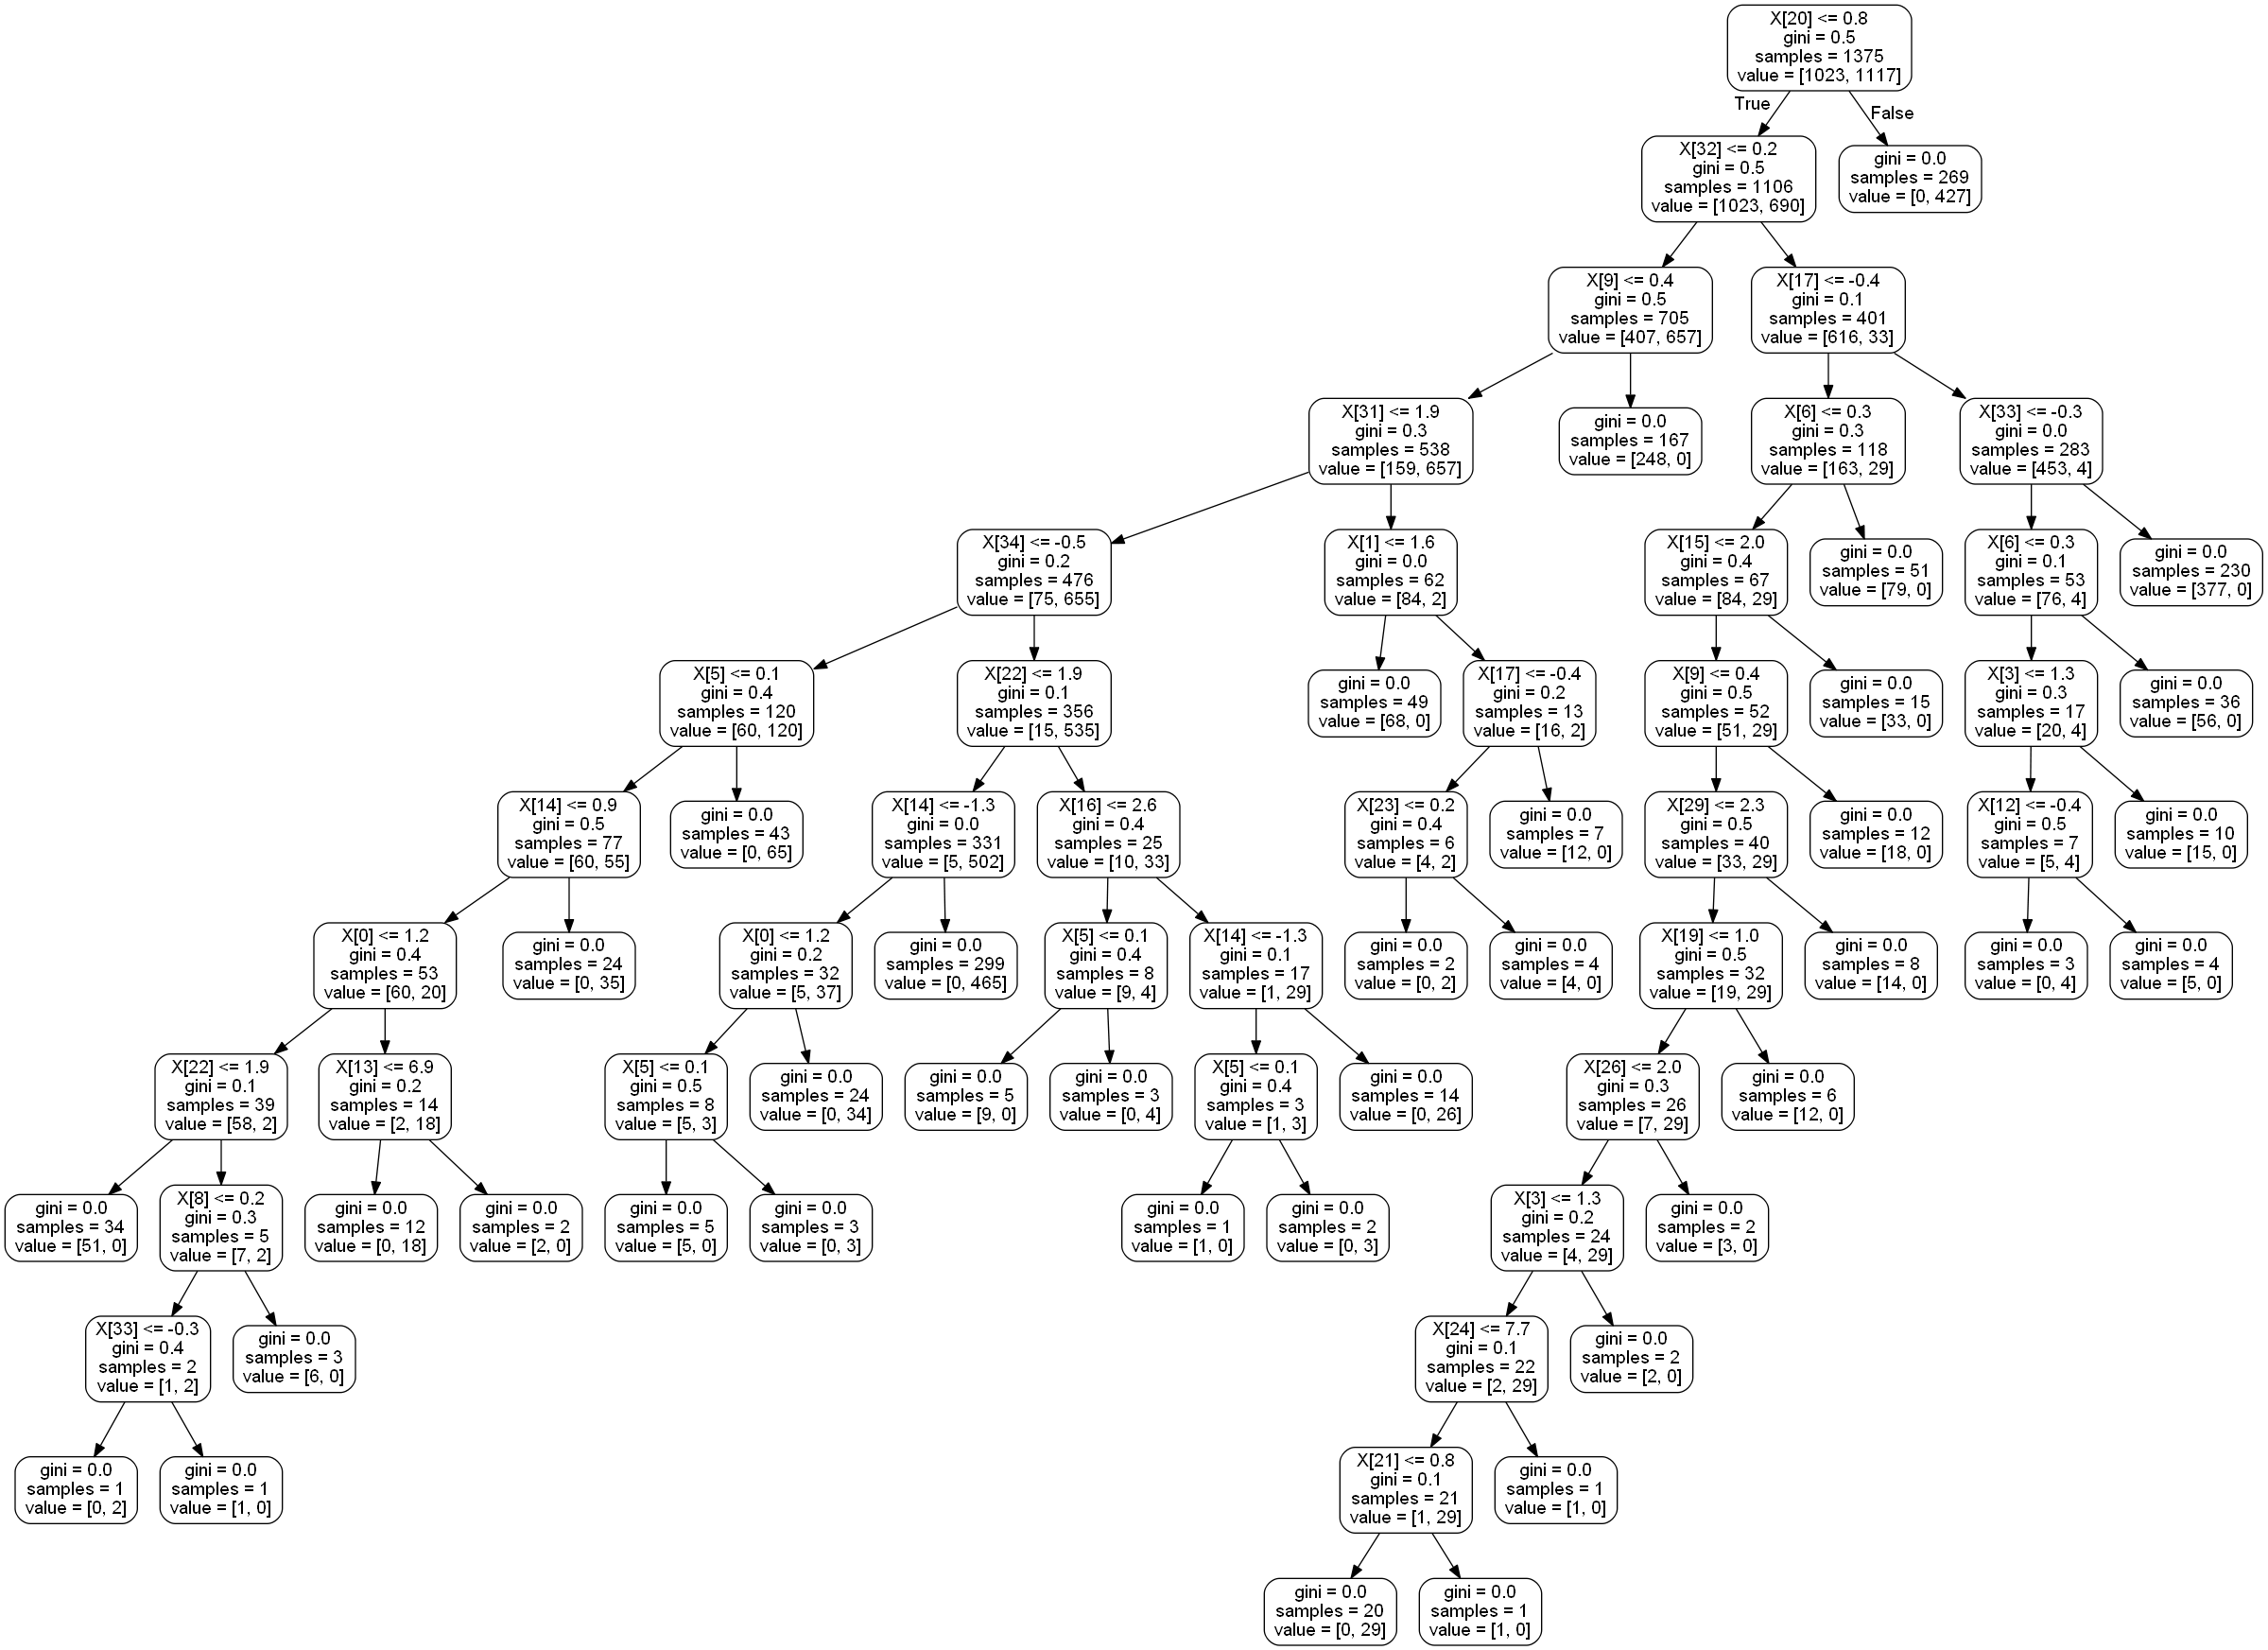

In [106]:
Image("tree_ho.png")

### Visualization of validation losses

0.03738317757009346


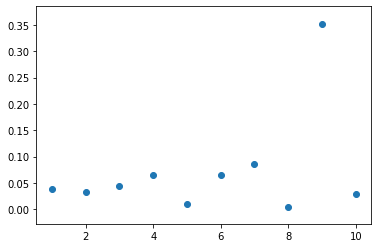

In [107]:
print(estim.trials.results[0]['loss'])

y = range(1, n_iter_search+1)
X = [i['loss'] for i in estim.trials.results]
plt.figure(1) 
plt.scatter(y, X)
plt.show()

## Random search of hyperparameters

In [120]:
from operator import itemgetter
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [121]:
clf = RandomForestClassifier(random_state=42)

# parameters range for random search
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 3),
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
               "n_estimators": randint(1, 3000)}

In [122]:
n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search)

In [123]:
%%timeit -o
random_search.fit(X_train, y_train)

print("=====RESULTS======")
print(random_search.score(X_test, y_test))
print(random_search.best_estimator_)

=====RESULTS======
0.9620853080568721
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=287,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9563981042654028
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=411,
                       n_jobs=None, oob_score=False, random_state=42, ve

<TimeitResult : 1 loop, best of 3: 53.6 s per loop>

In [124]:
runtime_rs = _

### Visualization of a tree from Random Forest

In [125]:
tree = random_search.best_estimator_[0]
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree_rs.png')

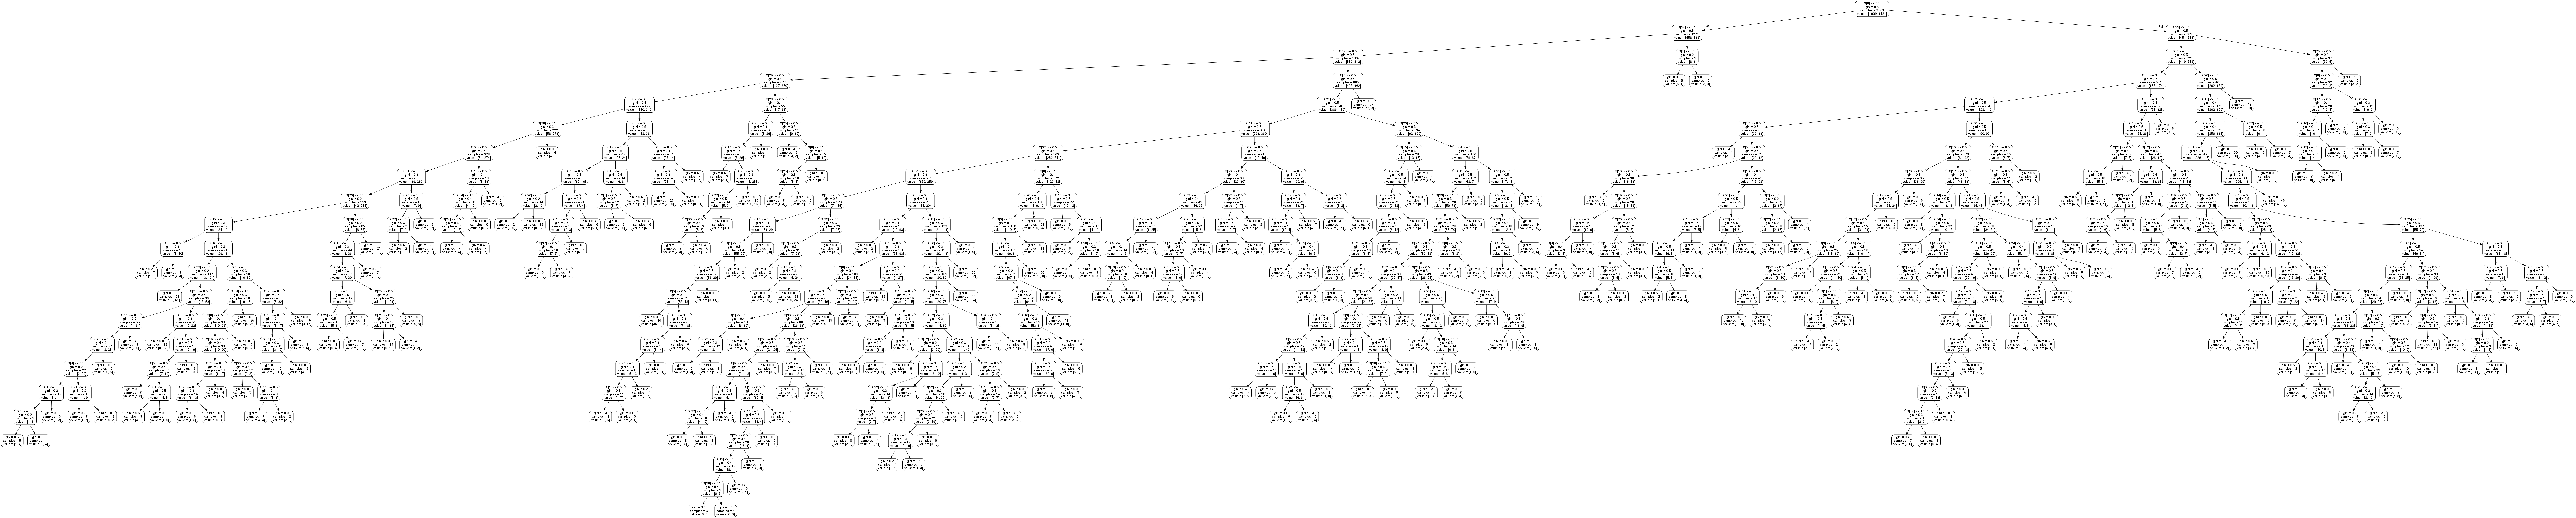

In [126]:
Image('tree_rs.png')

### Visualization of evaluation scores

<Figure size 432x288 with 0 Axes>

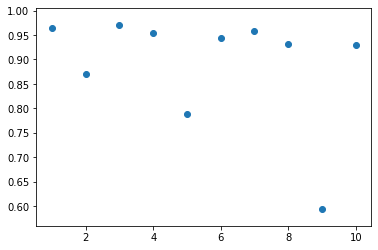

In [127]:
y = range(1, n_iter_search+1)
X = random_search.cv_results_[f'mean_test_score'][::-1]
plt.figure(2) 
plt.scatter(y, X)
plt.show()

### Comparison of runtime

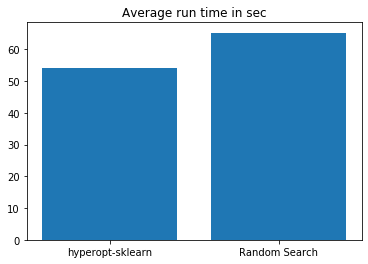

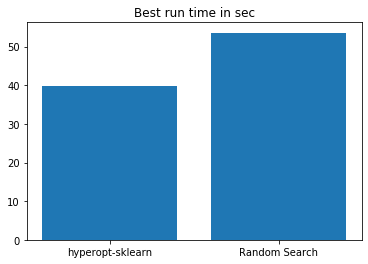

In [146]:
mean_ho = sum(runtime_ho.all_runs)/len(runtime_ho.all_runs)
mean_rs = sum(runtime_rs.all_runs)/len(runtime_rs.all_runs)

plt.figure(3)
plt.title("Average run time in sec")
plt.bar(["hyperopt-sklearn", "Random Search"],[mean_ho, mean_rs])

plt.figure(4)
plt.title("Best run time in sec")
plt.bar(["hyperopt-sklearn", "Random Search"],[runtime_ho.best, runtime_rs.best])
plt.show()

## Dataset 2

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Census+Income

In [115]:
data2 = pd.read_csv("adult.data", names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                                                "occupation", "relationship", "race", "sex",
                                                "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])
data2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [116]:
# chess_data = pd.read_csv("krkopt.data", names=["White King file (col)",
#                                            "White King rank (row)",
#                                            "White Rook file", 
#                                            "White Rook rank", 
#                                            "Black King file", 
#                                            "Black King rank", 
#                                            "optimal depth-of-win"]

In [117]:
data2 = data2.drop(['education-num', 'fnlwgt'], axis=1)
data2 = data2.drop(['index'], axis=1)

In [ ]:
data2.describe()

In [ ]:
cat_cols = ["workclass", "education", "marital-status",
                                                "occupation", "relationship", "race", "sex",
                                                 "native-country", "income"]

le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)
for col in cat_cols:
    data2[col] = le.fit_transform(data2[col])
    data2[col] = ohe.fit_transform(np.array(data2[col]).reshape(-1, 1))
    
data2.head()

In [ ]:
data2 = data2.reset_index()

In [ ]:
X2 = data2.loc[:, :'workclass']

In [ ]:
y2 = data2.loc[:, 'income']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

# y_p_test = np.array(y_p_test)

In [ ]:
X2_train = np.array(X2_train)
X2_test = np.array(X2_test)

In [ ]:
np.any(np.isnan(data2))

In [ ]:
np.all(np.isfinite(data2))

In [ ]:
n_iter_search = 1
estim2 = HyperoptEstimator(classifier=random_forest('myRF2'), max_evals=n_iter_search, seed=42)
estim2.fit(X2_train, y2_train)
print("=====RESULTS======")
print(estim2.score(X2_test, y2_test))
print(estim2.best_model())

## Gaussian process vusialization

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)

In [ ]:
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gp = GaussianProcessRegressor(kernel=kernel)
# Prior
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
X_ = np.linspace(0, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1, c='g')
plt.xlim(0, 5)
plt.ylim(-3, 3)

# Generate data and fit GP
rng = np.random.RandomState(4)
X = rng.uniform(0, 5, 10)[:, np.newaxis]
y = np.sin((X[:, 0] - 2.5) ** 2)
gp.fit(X, y)

# Posterior
plt.subplot(2, 1, 2)
X_ = np.linspace(0, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)

y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1, c='g')
plt.scatter(X[:, 0], y, c='grey', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.xlim(0, 5)
plt.ylim(-3, 3)
plt.tight_layout()
plt.savefig('gp.png', format='png', dpi=600)
plt.show()